<a href="https://colab.research.google.com/github/aureliowozhiak/facebook_prophet_covid19/blob/main/notebooks/Facebook_Prophet_e_os_casos_de_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<p align="center"><img src="https://raw.githubusercontent.com/aureliowozhiak/facebook_prophet_covid19/main/images/prophet_logo.png" /></p>

# Facebook Prophet e os casos de COVID-19

## Análisando a série temporal dos casos de Corona Virus em Curitiba-PR e criando previsões<sup>*</sup> com o Facebook Prophet

<sup><sub>*As previsões criadas aqui pelo Prophet não são exatas pois não mostram de fato o cenário futuro do corona virus, pois os dados utilizados apenas nos dão uma visão, com base no que aconteceu no passado, para termos uma noção de qual poderia ser a tendência de crescimento dos casos, porém, como os dados não exprimem  o cenário completo e não leva em conta campanhas futuras de vacinação, que já estão acontecendo, não devemos levar essas conclusões como se fossem verdades absolutas.</sub></sup>


---
## Visão geral do projeto:

 - Objetivo do projeto
 - Introdução
     - O Brasil em dados libertos
     - A pandêmia do COVID-19
     - O que é o Facebook Prophet?
 - Importação de bibliotecas
 - Origem dos dados e informações técnicas
 - Carregamento e Processamento dos dados
 - Análisando a série temporal dos casos de COVID-19 em Curitiba-PR
 - Criando o modelo de previsão
 - Plotando as previsões com o Prophet<sup>*</sup>
 - Pesquisa complementar
 - Conclusão
 - Referências

---
### 🎯 Objetivo do projeto

A ideia aqui é efetuar algumas analises nos dados referentes ao casos de COVID-19 desde seu primeiro caso aqui no Brasil até o momento e tentar efetuar algumas previsões* utilizando uma ferramenta de open source para forecasting(previsão) do Facebook, o Prophet!

---
### ⭐ Introdução

#### - O Brasil.io

O [brasil.io](https://brasil.io/home/) surgiu com o objetivo de disponibilizar dados públicos de forma mais acessível para qualquer pessoa conseguir acessar e fazer uso desses dados.

![](https://raw.githubusercontent.com/aureliowozhiak/facebook_prophet_covid19/main/images/brasil.io.png)

>Após a criação da Lei de Acesso à Informação, todas as informações produzidas ou custodiadas pelo poder público são públicas e portanto, disponíveis a todos os cidadãos, exceto aquelas que são sigilosas por lei. Contudo, mesmo que a informação esteja disponível não significa que ela está em um formato acessível 

<sub>adaptado: https://brasil.io/manifesto/ - acesso em: 16/06/2021 </sub>

#### - A pandêmia do COVID-19

![](https://raw.githubusercontent.com/aureliowozhiak/facebook_prophet_covid19/main/images/SARS-CoV-2_without_background.png)

>A pandemia de COVID-19, também conhecida como pandemia de coronavírus, é uma pandemia em curso de COVID-19, uma doença respiratória causada pelo coronavírus da síndrome respiratória aguda grave 2 (SARS-CoV-2). O vírus tem origem zoonótica e o primeiro caso conhecido da doença remonta a dezembro de 2019 em Wuhan, na China. Em 20 de janeiro de 2020, a Organização Mundial da Saúde (OMS) classificou o surto como Emergência de Saúde Pública de Âmbito Internacional e, em 11 de março de 2020, como pandemia. Em 16 de junho de 2021, 176 568 410 casos foram confirmados em 192 países e territórios, com 3 819 480 mortes atribuídas à doença, tornando-se uma das pandemias mais mortais da história.

<sub>adaptado: https://pt.wikipedia.org/wiki/Pandemia_de_COVID-19 - acesso em: 16/06/2021 </sub>

#### O que é o Facebook Prophet?

Em fevereiro de 2017 o Facebook Research lançou a ferramenta open source chamada [Facebook Prophet](https://facebook.github.io/prophet/) para previsão de séries temporais, ou seja, esse algortimo "profeta" do Facebook tem por objetivo principal prever uma tendência no comportamento dos dados com apenas poucos meses de histórico.<br/>
Como essa ferramenta, também é possível entender sazonalidades que impactam a série temporal e análisar mudanças bruscas de tendência e outliers

Essa ferramenta está [disponível no GitHub](https://github.com/facebook/prophet) para ser utilizada com Python ou R.

---
#### Importação de bibliotecas

In [ ]:
!pip install wget
import wget
wget.download('https://github.com/aureliowozhiak/facebook_prophet_covid19/blob/main/notebooks/funcoes.py')

import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from pandas.plotting import autocorrelation_plot
import warnings
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_error
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

from funcoes import processamento_dados
from funcoes import grafico_linha

warnings.filterwarnings("ignore")

---
#### Origem dos dados e informações técnicas


---
#### Carregamento e Processamento dos dados

Todos os datasets foram baixados e importados para o repositório no GitHub https://github.com/aureliowozhiak/facebook_prophet_covid19/tree/main/datasets 

Vamos utilizar a biblioteca pandas para carregar, processar e tratar esses dados antes de iniciar nosso projeto.

In [ ]:
#carregando nossos dataframes
df_casos_full, df_casos_full_reduced, df_casos_parana, df_casos_rmc, df_casos_cwb, rmc_top_cities, df_rmc_top_cities = processamento_dados()

In [ ]:
#parametros para padronizar gráficos
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

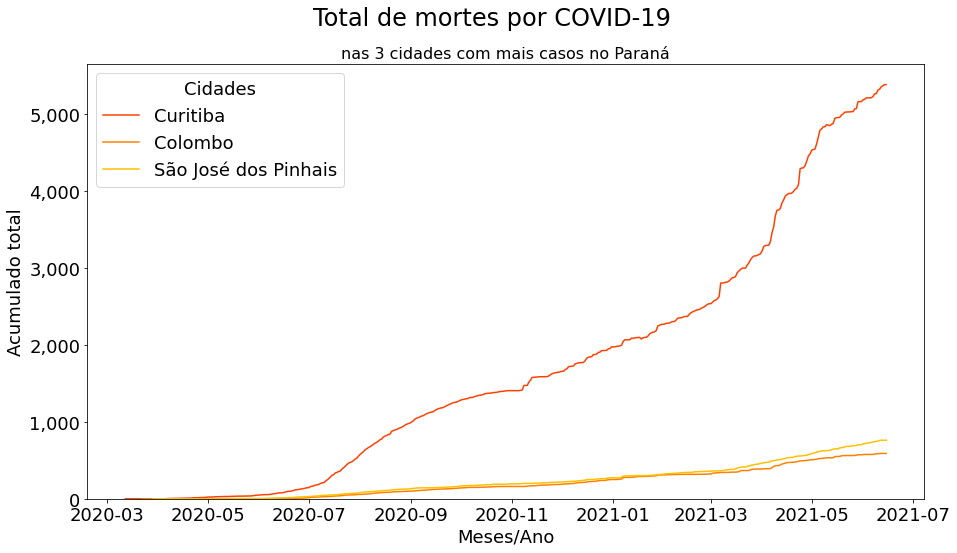

In [ ]:
grafico_linha()

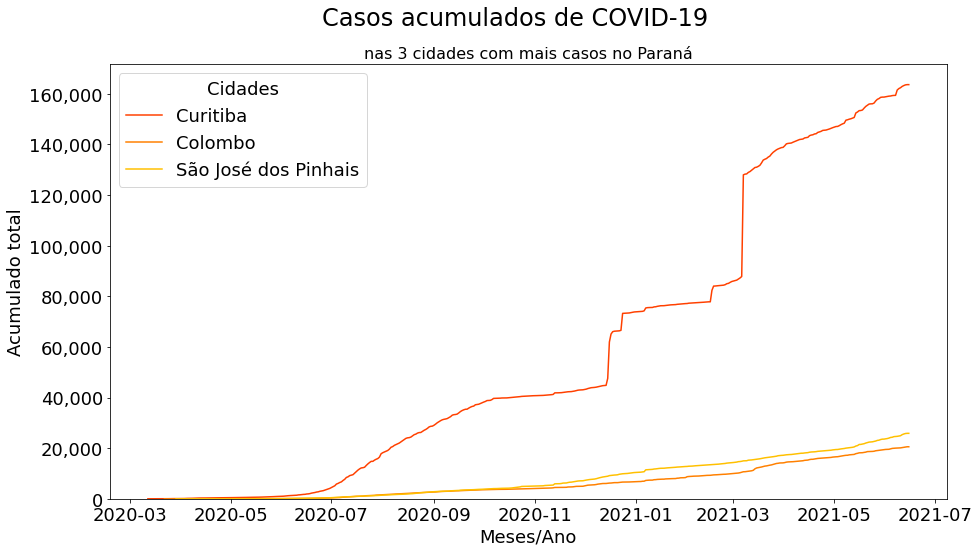

In [ ]:
grafico_linha(titulo = 'Casos acumulados de COVID-19', df_y = 'last_available_confirmed')

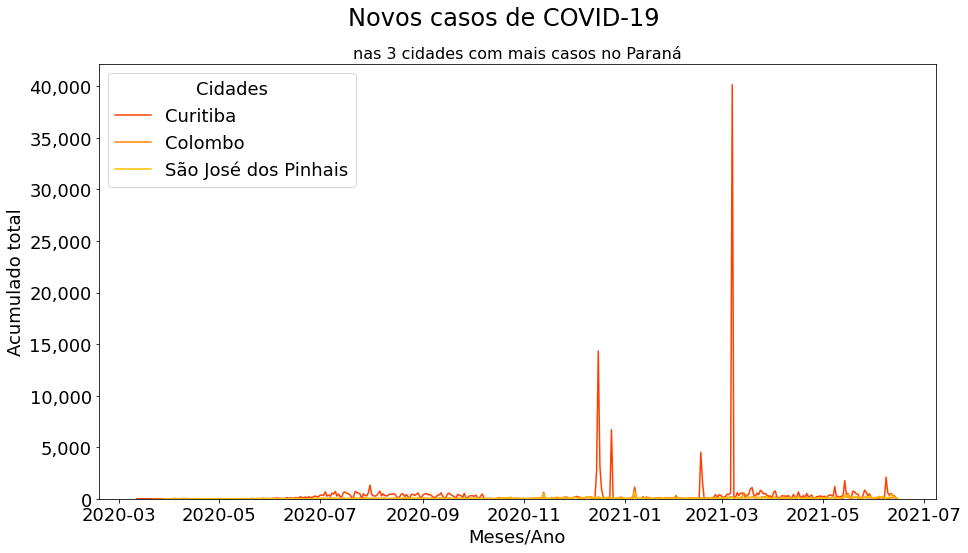

In [ ]:
 grafico_linha(titulo = 'Novos casos de COVID-19', df_y = 'new_confirmed')

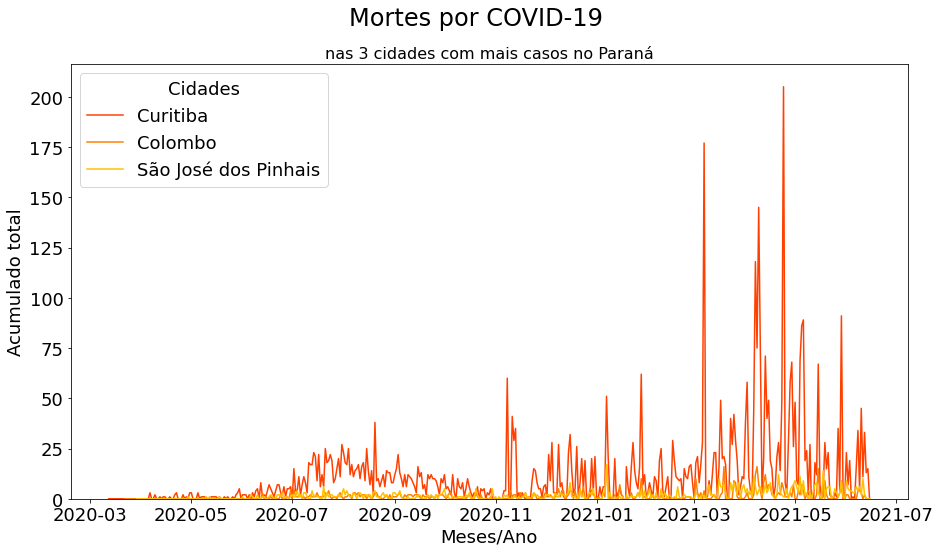

In [ ]:
grafico_linha(titulo = 'Mortes por COVID-19', df_y = 'new_deaths')